# Linear Regression
## Finding meaningful dependencies

In [120]:
from utils import cluster_plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None, 
                 sep='\s+')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
                 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = feature_names


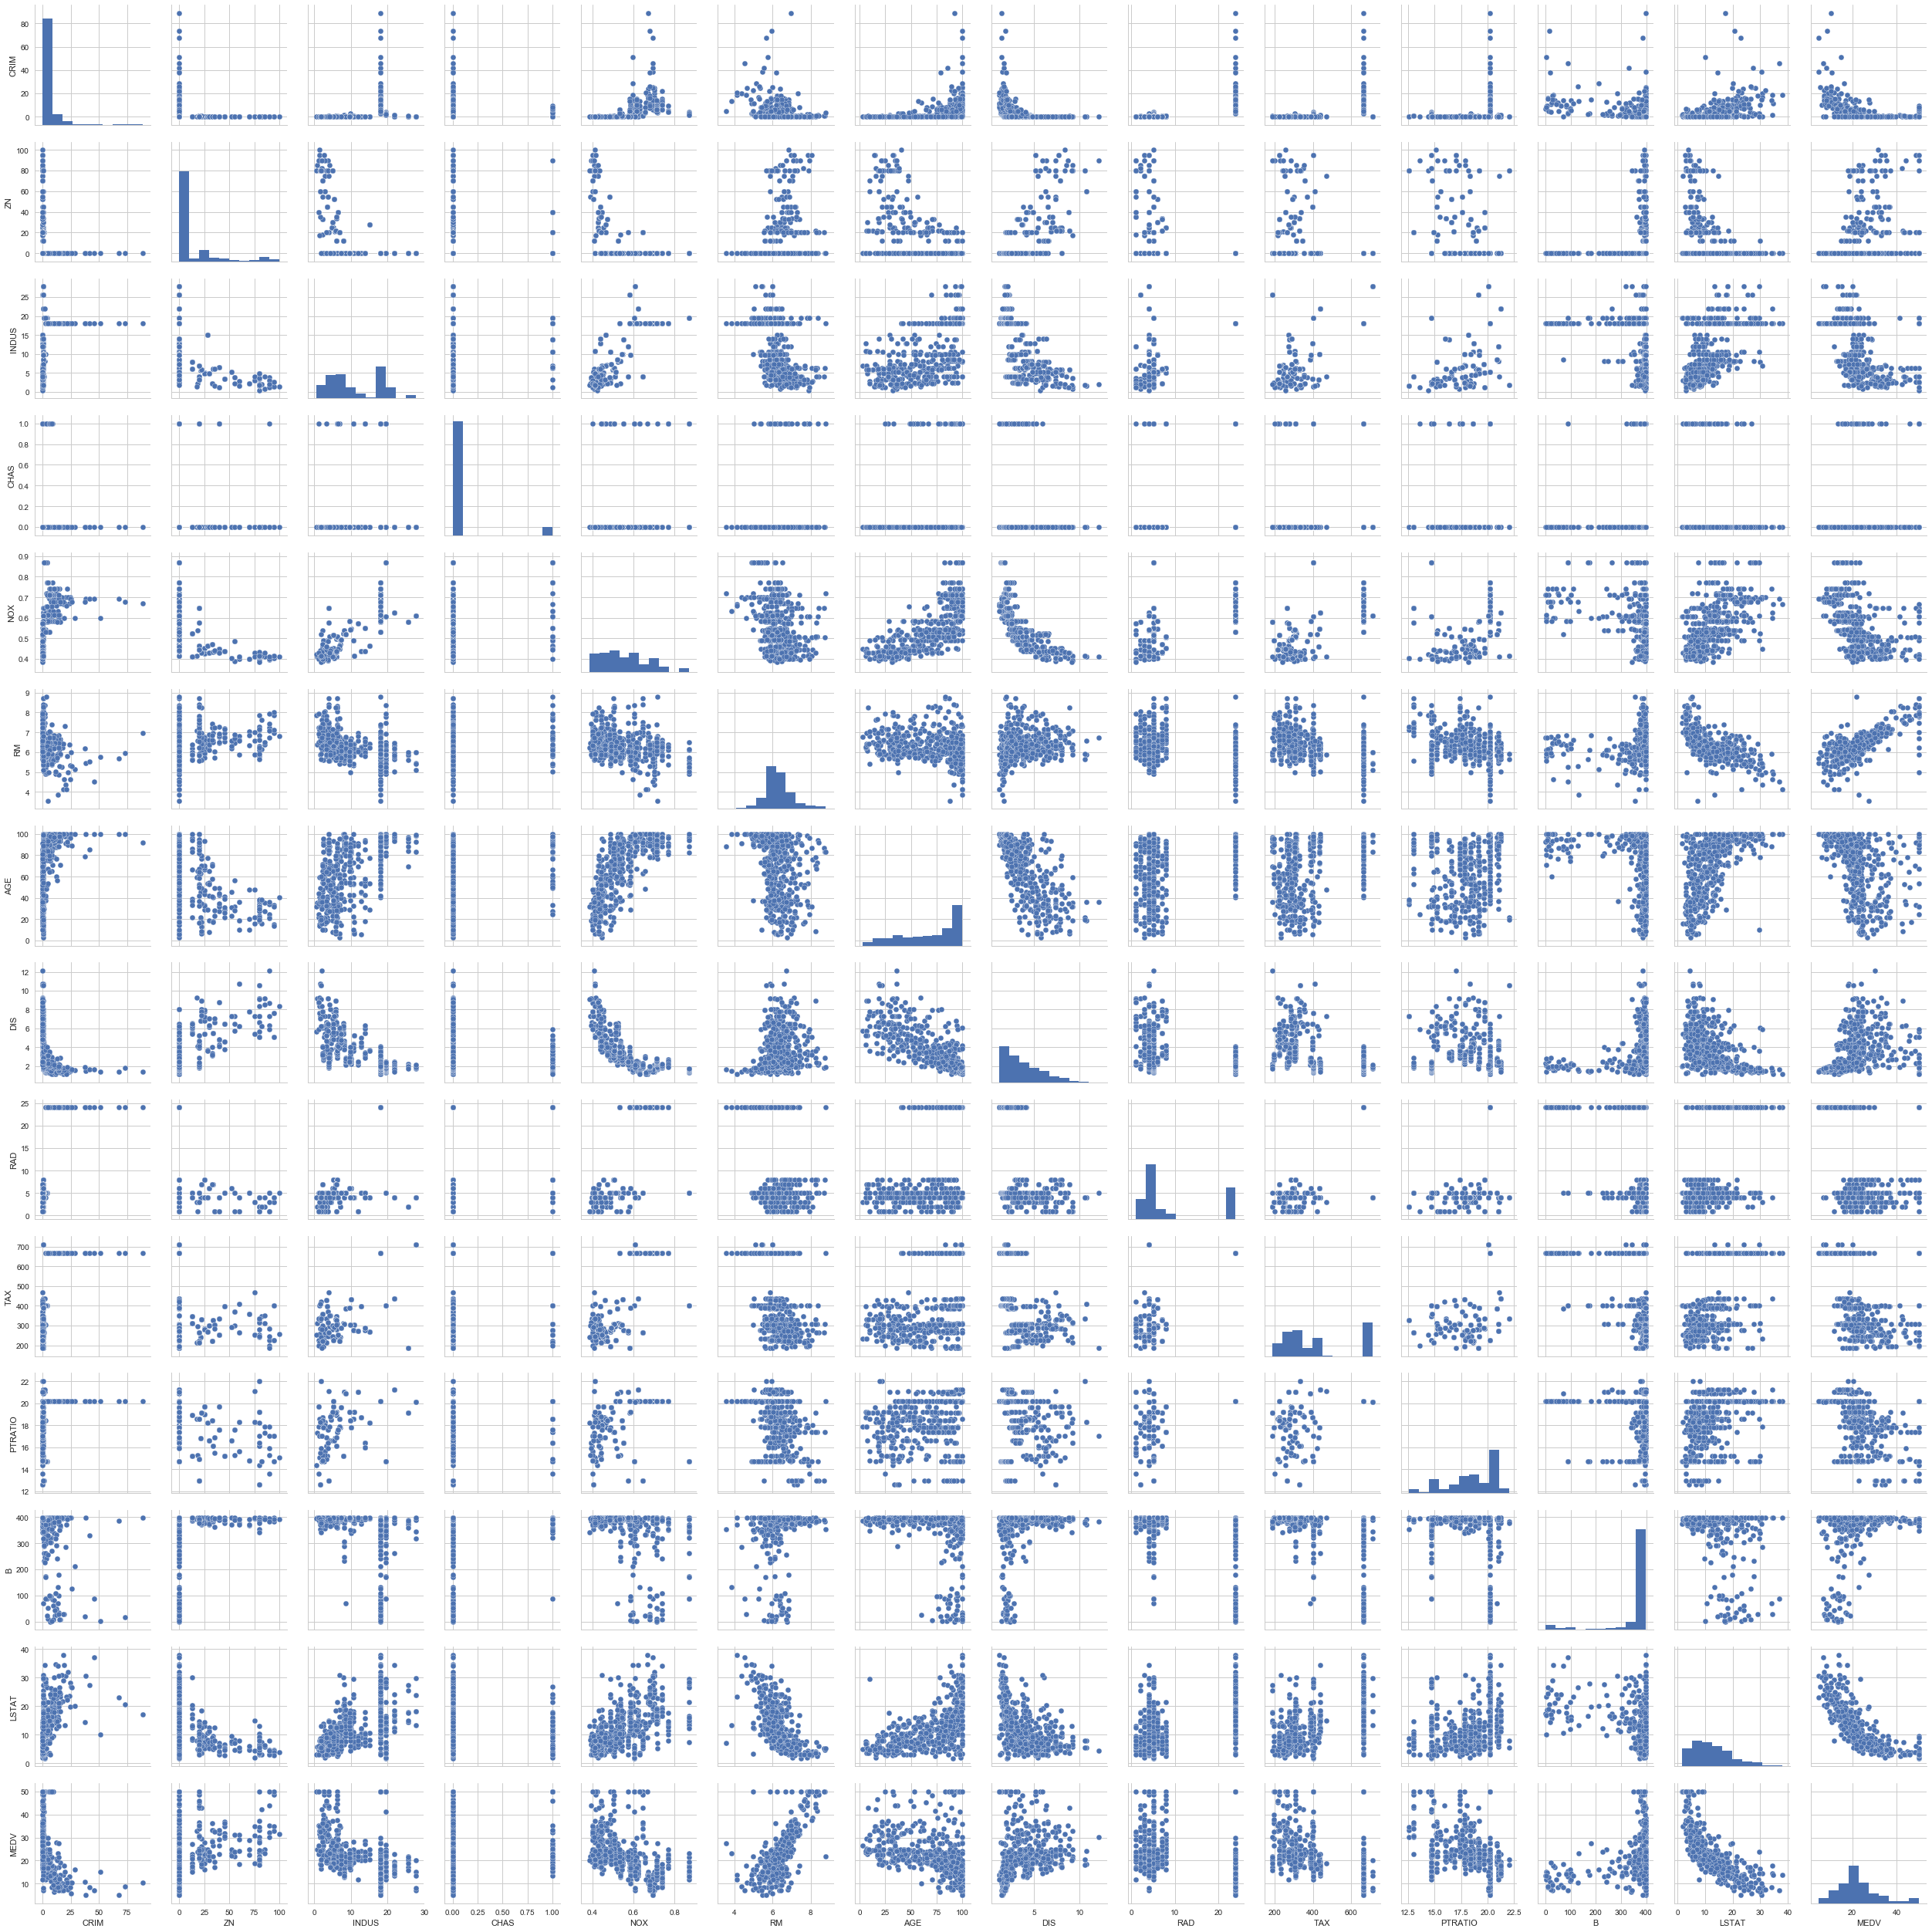

In [121]:
sb.set(style='whitegrid', context='notebook')
sb.pairplot(df)
plt.show()

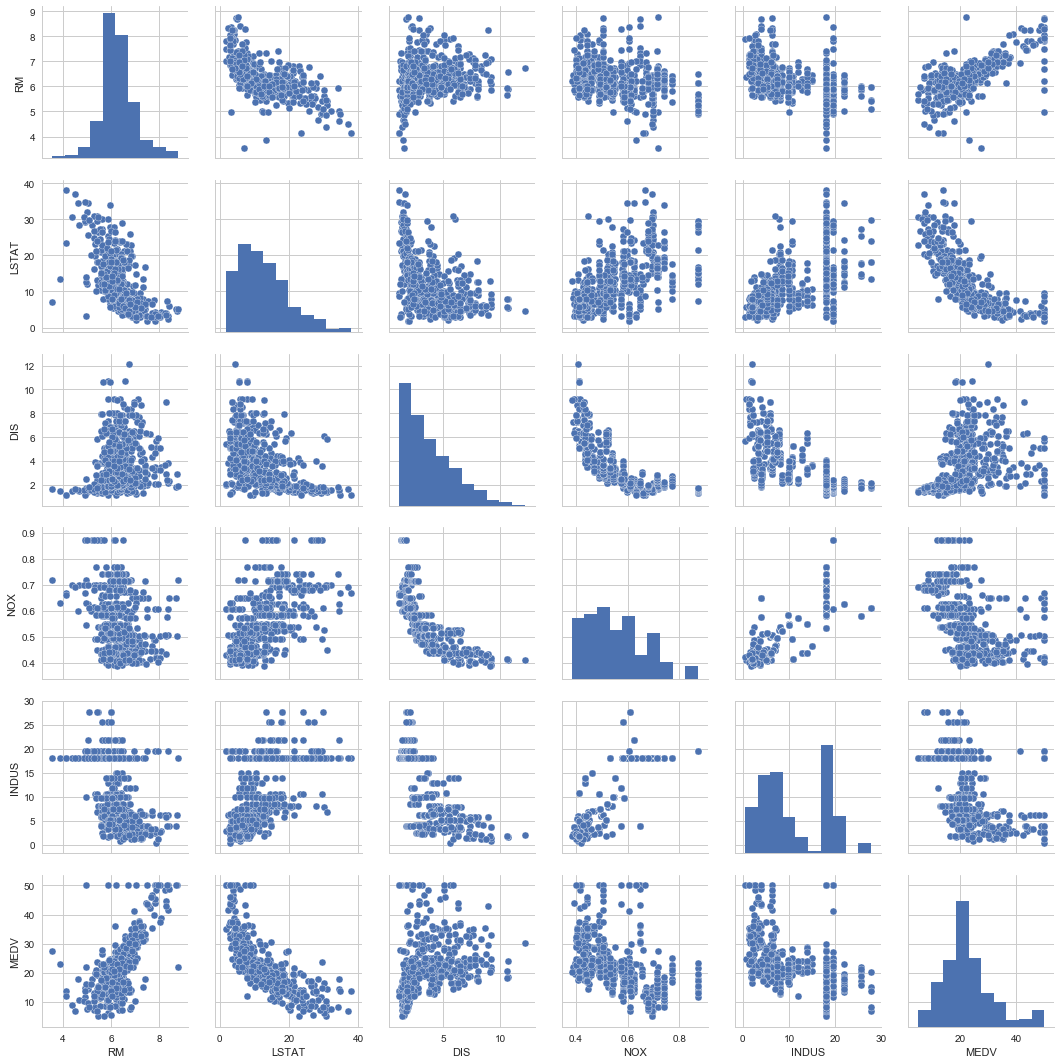

In [122]:
# The dependencies that seem to be linear (that is what we need)
cols = ['RM', 'LSTAT', 'DIS', 'NOX', 'INDUS', 'MEDV']
sb.pairplot(df[cols])
plt.show()

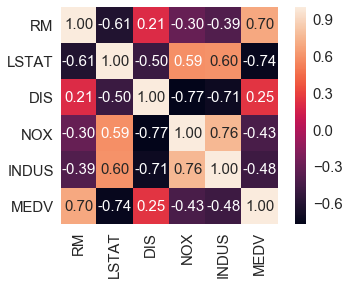

In [123]:
cm = np.corrcoef(df[cols].values.T)
sb.set(font_scale=1.5)
heatmap = sb.heatmap(cm, cbar=True, annot=True, square=True,
                     fmt='.2f', annot_kws={'size':15},
                     yticklabels=cols, xticklabels=cols)
plt.show() 
sb.reset_orig()
# We can see that value hardly depends on room numbers

## Manual implementation 

In [189]:
# Linear regression based on Gradient descent
class LinearRegression:
    def __init__(self, alpha=0.001, n_iter=30):
        self.alpha = alpha
        self.n_iter = n_iter
        
    def line(self, X):
        return np.dot(X, self.w1) + self.w0 
    
    def fit(self, X, y):
        self.w0 = 0
        self.w1 = X.shape[1]
        self.cost = []
        
        for i in range(self.n_iter):
            yhat = self.line(X)
            error = (y - yhat)
            # Update weights
            self.w1 += self.alpha*X.T.dot(error)
            self.w0 += self.alpha*error.sum()
            # Sum of squared errors as a cost function
            cost = (error**2).sum()/2.0
            self.cost.append(cost)
    
    def predict(self, X):
        return self.line(X)

In [125]:
class Scaler:
    def fit(self, data):
        self.mean = np.mean(data)
        sum_sq = ((data-self.mean)**2).sum()
        self.N = len(data)
        self.std_dev = np.sqrt(sum_sq/self.N)
    
    def fit_std(self, data):
        self.fit(data)
        return self.standardize(data)
    
    def standardize(self, data):
        return (data - self.mean)/self.std_dev
    
    def revert(self, data_std):
        return data_std*self.std_dev+self.mean

In [126]:
# Well it would be easier to use already implemented StandardScaler
# but it's forbidden by requirements :)
# from sklearn.preprocessing import StandardScaler

x_sc = Scaler()
y_sc = Scaler()
X_train = df[['RM']].values
y_train = df[['MEDV']].values
X_std = x_sc.fit_std(X_train)
y_std = y_sc.fit_std(y_train)
lr = LinearRegression()
lr.fit(X_std, y_std)

### Error cost function

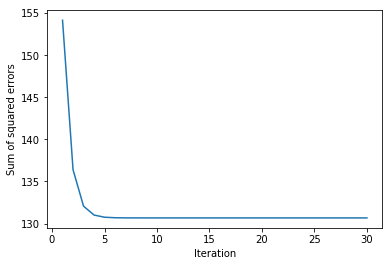

In [127]:
plt.plot(range(1, lr.n_iter+1), lr.cost)
plt.ylabel('Sum of squared errors')
plt.xlabel('Iteration')
plt.show()

## Sklearn implementation

In [130]:
from sklearn.linear_model import LinearRegression

lr_sc = LinearRegression()
lr_sc = lr_sc.fit(X_std, y_std)

### Algorithms comparison

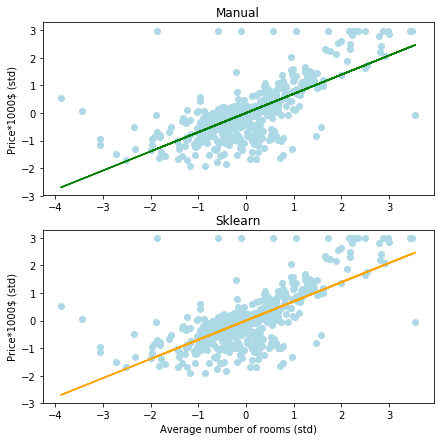

In [188]:
plt.figure(figsize=(7,7))
plt.subplot(2, 1, 1)
plt.scatter(X_std, y_std, color='lightblue')
plt.plot(X_std, lr.predict(X_std), color='green')
plt.title('Manual')
plt.ylabel('Price*1000$ (std)')

plt.subplot(2, 1, 2)
plt.scatter(X_std, y_std, color='lightblue')
plt.plot(X_std, lr.predict(X_std), color='orange')
plt.title('Sklearn')
plt.xlabel('Average number of rooms (std)')
plt.ylabel('Price*1000$ (std)')
plt.show()

### How much will the 5 room flat cost?

In [146]:
input_std = x_sc.standardize([5.0])
pred_lr = lr.predict(input_std)
pred_lr = x_sc.revert(pred_lr)[0]
pred_sc = lr_sc.predict([input_std])
pred_sc = x_sc.revert(pred_sc)[0,0]

print(f' Manual implementation predicted cost: {pred_lr*1000:.2f}$\n',
f'Sklearn implementation predicted cost: {pred_sc*1000:.2f}$')

 Manual implementation predicted cost: 5391.35$
 Sklearn implementation predicted cost: 5391.35$


In [158]:
print('Final linear equation:',
     f'y=x*{lr.w1[0,0]:.2f}+({lr.w0:.2f})')

Final linear equation: y=x*0.70+(-0.00)
